# Grab Data Safety Challenge 

Objectives: To determine if a certain drive is a safe drive or reckless drive
How to know:
    1. From the acceleration at the certain point
    2. From the Location and any other geolocation behavior

In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import pprint

import os, math

features_list_files = [f for f in os.listdir('./features') if not f.startswith('.')]
labels_list_files = [f for f in os.listdir('./labels') if not f.startswith('.')]

In [31]:
print(features_list_files)
print(labels_list_files)

['part-00000-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv', 'part-00001-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv', 'part-00002-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv', 'part-00003-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv', 'part-00004-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv', 'part-00005-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv', 'part-00006-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv', 'part-00007-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv', 'part-00008-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv', 'part-00009-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv']
['part-00000-e9445087-aa0a-433b-a7f6-7f4c19d78ad6-c000.csv']


# Extractions of csv and stitchings

In [41]:
def generateDf(filename,folder):
    drive_path = './'+folder+'/' + filename
    df_category = pd.read_csv(drive_path)
    return df_category

In [52]:
def generateSafetyDf(filenames):
    df_safety= pd.DataFrame(columns=['bookingID', 'Accuracy', 'Bearing', 'acceleration_x', 'acceleration_y',
       'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z', 'second', 'Speed'])
    for filename in filenames:
        df_safety = pd.concat([df_safety,generateDf(filename,'features')])
    return df_safety
        

In [55]:
df_safety = generateSafetyDf(features_list_files)
df_label = generateDf(labels_list_files[0],'labels')

In [79]:
df_label['bookingID'] = df_label['bookingID'].astype(object)

In [80]:
print(df_safety.size)
print(df_label.size)

177491171
40036


In [81]:
df_safety.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,1202590843006,3.000,353.0,1.228867,8.900100,3.986968,0.008221,0.002269,-0.009966,1362.0,0.000000
1,274877907034,9.293,17.0,0.032775,8.659933,4.737300,0.024629,0.004028,-0.010858,257.0,0.190000
2,884763263056,3.000,189.0,1.139675,9.545974,1.951334,-0.006899,-0.015080,0.001122,973.0,0.667059
3,1073741824054,3.900,126.0,3.871543,10.386364,-0.136474,0.001344,-0.339601,-0.017956,902.0,7.913285
4,1056561954943,3.900,50.0,-0.112882,10.550960,-1.560110,0.130568,-0.061697,0.161530,820.0,20.419409


In [82]:
df_label.head()

,bookingID,label
0,111669149733,0
1,335007449205,1
2,171798691856,0
3,1520418422900,0
4,798863917116,0


In [83]:
df_merge = pd.merge(df_safety,df_label,on='bookingID')

In [84]:
df_merge.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
0,1202590843006,3.000,353.0,1.228867,8.900100,3.986968,0.008221,0.002269,-0.009966,1362.0,0.000000,1
1,1202590843006,3.033,77.0,1.137217,8.975278,3.981050,0.021118,-0.022515,0.024522,541.0,0.000000,1
2,1202590843006,6.173,283.0,1.522818,7.947064,5.075056,0.137567,-0.297055,-0.017418,154.0,2.863286,1
3,1202590843006,3.014,353.0,1.134775,8.932489,3.929421,-0.007959,-0.020543,-0.022986,1384.0,0.000000,1
4,1202590843006,5.209,340.0,0.858197,9.078037,2.944571,0.061924,0.015219,0.025517,1142.0,9.750134,1


## Generate Pickle for easy nitpicking of df_merge

In [85]:
import pickle

with open('df_merge.pickle', 'wb') as f:
    pickle.dump(df_merge, f)
    
with open('df_safety.pickle', 'wb') as f:
    pickle.dump(df_safety, f)

with open('df_label.pickle', 'wb') as f:
    pickle.dump(df_label, f)

## Opening Pickles for easy dataframe generation

In [87]:
df_merge = pd.read_pickle('df_merge.pickle')
df_safety = pd.read_pickle('df_safety.pickle')
df_label = pd.read_pickle('df_label.pickle')

In [89]:
print(df_merge.shape)
print(df_safety.shape)
print(df_label.shape)

(16154418, 12)
(16135561, 11)
(20018, 2)


# What is the metadata?

The difference of gyrometer and accelerometer:
A gyroscope is a device that uses Earth's gravity to help determine orientation
An accelerometer is a compact device designed to measure non-gravitational acceleration. When the object it's integrated into goes from a standstill to any velocity

It can do this in all 3 XYZ axis, or directions, which are left/right (X), forward/backwards (Y), and up/down (Z)

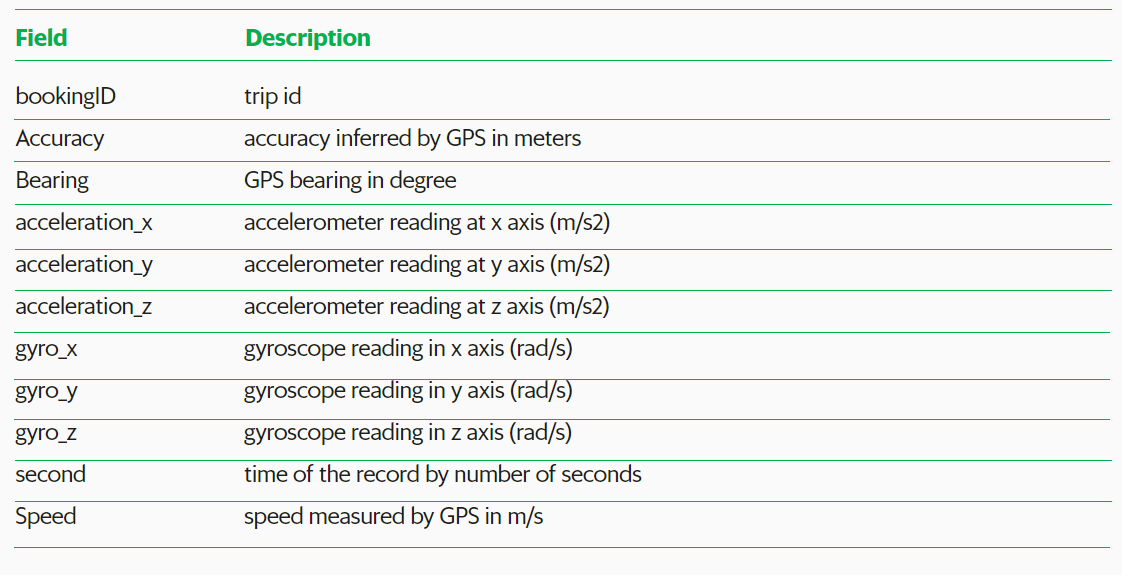

# Let's do an exploratory analysis

To explore and understand the dataset
- Viewing the data
    - Create a grouping of merged Booking ID.
    - Find out the aggregations of each variable.
    - Correlation Analysis
    - Graphing using matplotlib
- Comparing models and discuss improvements

Challenges:
Cleaning out the data

In [95]:
# Describing the dataset
df_merge.describe().T

,count,mean,std,min,25%,50%,75%,max
Accuracy,16154418.0,11.607443,8.686924e+01,0.750000,3.900000,4.255000,8.000000,6.070101e+03
Bearing,16154418.0,168.977125,1.072962e+02,0.000000,78.000000,168.962120,263.000000,3.599995e+02
acceleration_x,16154418.0,0.069311,1.423701e+00,-78.419685,-0.507825,0.061600,0.635379,6.687346e+01
acceleration_y,16154418.0,4.464359,8.132821e+00,-72.994119,-2.113992,9.081207,9.709685,7.505589e+01
acceleration_z,16154418.0,0.892730,3.252890e+00,-78.448420,-0.933767,0.774093,2.749072,7.805576e+01
gyro_x,16154418.0,-0.001713,1.445047e-01,-48.455750,-0.026783,-0.000644,0.023300,3.983975e+01
gyro_y,16154418.0,0.000266,3.398832e-01,-74.888610,-0.029947,0.000262,0.031418,8.031496e+01
gyro_z,16154418.0,-0.000254,1.480109e-01,-53.554450,-0.018759,-0.000035,0.018234,6.630078e+01
second,16154418.0,3799.904859,1.435848e+06,0.000000,241.000000,520.000000,863.000000,1.495797e+09
Speed,16154418.0,9.006626,8.106292e+00,-2.000000,1.020000,7.530000,15.480000,1.480186e+02


In [96]:
# Describing the dataset (non numerical values)
df_merge.describe(include=['object'])

,bookingID
count,16154418
unique,20000
top,438086664371
freq,7561


In [101]:
# In a more simplified way
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16154418 entries, 0 to 16154417
Data columns (total 12 columns):
bookingID         object
Accuracy          float64
Bearing           float64
acceleration_x    float64
acceleration_y    float64
acceleration_z    float64
gyro_x            float64
gyro_y            float64
gyro_z            float64
second            float64
Speed             float64
label             int64
dtypes: float64(10), int64(1), object(1)
memory usage: 1.6+ GB


### Seems like we have a clean data with values for all 1.6 million rows

## Aggregate data with booking ID

In [104]:
df_aggregate_mean = df_merge.groupby(['bookingID']).mean()

In [113]:
df_aggregate_mean_reckless = df_aggregate_mean[df_aggregate_mean['label']==1]
df_aggregate_mean_safe = df_aggregate_mean[df_aggregate_mean['label']==0]

In [118]:
print(df_aggregate_mean_reckless.size)
print(df_aggregate_mean_safe.size)

54813
164989


0.0    14999
1.0     4983
0.5       18
Name: label, dtype: int64


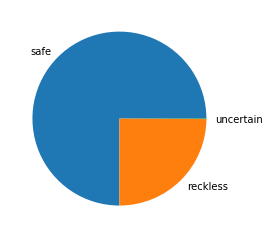

In [111]:
# Import seaborn and matplotlib with matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Getting the count of people that leave and not
labelcounts=df_aggregate_mean['label'].value_counts()
print(labelcounts)

# Using matplotlib pie chart and label the pie chart
plt.pie(labelcounts,labels=['safe','reckless','uncertain']);

C:\new_software\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


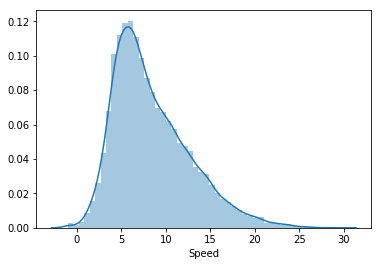

In [112]:
# Getting the distribution of label
sns.distplot(df_aggregate_mean['Speed']);

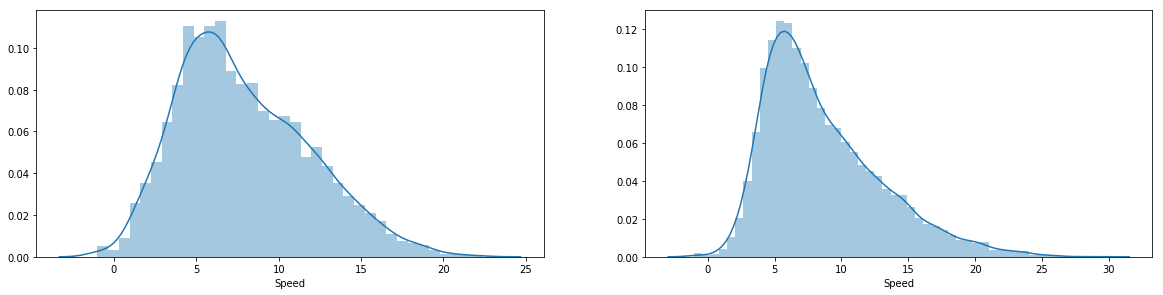

In [117]:
# Create a figure instance, and the two subplots
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

# Tell pointplot to plot on ax1 with the ax argument (speed)
sns.distplot(df_aggregate_mean_reckless['Speed'],ax = ax1);
# Tell the factorplot to plot on ax2 with the ax argument (speed)
sns.distplot(df_aggregate_mean_safe['Speed'],ax = ax2);

### In terms of speed: It is actually quite similar amongst the reckless and the safe drivings

In [125]:
df_aggregate_mean.corr()

,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
Accuracy,1.000000,0.001813,-0.005855,-0.202641,-0.124867,-0.028799,0.004703,0.002909,0.001258,-0.042222,0.006292
Bearing,0.001813,1.000000,-0.002346,-0.115312,-0.079200,-0.004892,-0.005136,-0.017744,0.002727,0.114007,-0.023058
acceleration_x,-0.005855,-0.002346,1.000000,0.068627,0.017269,-0.004121,0.001024,0.007346,-0.000444,0.005519,-0.005662
acceleration_y,-0.202641,-0.115312,0.068627,1.000000,0.397860,0.147207,-0.011017,0.009202,0.006165,-0.003668,-0.006896
acceleration_z,-0.124867,-0.079200,0.017269,0.397860,1.000000,0.100788,-0.014717,-0.005362,0.001114,-0.014707,0.033185
gyro_x,-0.028799,-0.004892,-0.004121,0.147207,0.100788,1.000000,0.075257,-0.002129,-0.017067,-0.014603,0.018658
gyro_y,0.004703,-0.005136,0.001024,-0.011017,-0.014717,0.075257,1.000000,-0.026305,0.001036,0.007790,-0.003615
gyro_z,0.002909,-0.017744,0.007346,0.009202,-0.005362,-0.002129,-0.026305,1.000000,0.014570,0.007451,0.001477
second,0.001258,0.002727,-0.000444,0.006165,0.001114,-0.017067,0.001036,0.014570,1.000000,-0.004278,-0.005410
Speed,-0.042222,0.114007,0.005519,-0.003668,-0.014707,-0.014603,0.007790,0.007451,-0.004278,1.000000,-0.072966


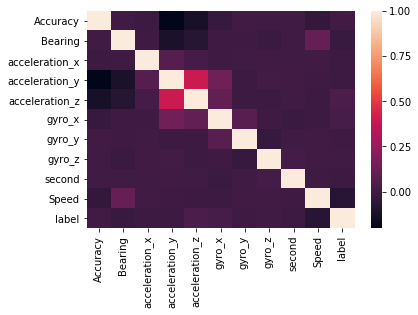

In [124]:
sns.heatmap(df_aggregate_mean.corr())

### There is no clear correlation yet

# Training the model

In [145]:
df_aggregate_mean.dtypes

Accuracy          float64
Bearing           float64
acceleration_x    float64
acceleration_y    float64
acceleration_z    float64
gyro_x            float64
gyro_y            float64
gyro_z            float64
second            float64
Speed             float64
label              object
dtype: object

In [146]:
df_aggregate_mean['label'] =df_aggregate_mean['label'].astype(int) 

In [147]:
import numpy as np
from sklearn import preprocessing,neighbors,svm
from sklearn.model_selection import train_test_split

#dropping left and sales X for the df, y for the left
X = df_aggregate_mean.drop(['label'],axis=1)
y = df_aggregate_mean['label']

#splitting the train and test sets
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.2)

In [148]:
# initiate svm object
clfsvm = svm.SVC()
# Fit the svm object with train data
clfsvm.fit(X_train,y_train)

C:\new_software\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [149]:
# Find the accuracy through the scoring process
accuracy = clfsvm.score(X_test,y_test)
accuracy

0.7475

In [150]:
pd.DataFrame(clfsvm.predict(X_test),y_test,columns=['ytest']).head()

,ytest
label,
1,0
0,0
0,0
0,0
0,0


### Analysis
SVM is very useful to classify observations with important predictiors and accuracy of 0.7475. This could be further improved

# Training Multiple Classifiers and Test Them
Log loss https://www.r-bloggers.com/making-sense-of-logarithmic-loss/

In [151]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 72.3750%
Log Loss: 3.913498343347398


C:\new_software\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC
****Results****
Accuracy: 74.9750%
Log Loss: 0.5617863602317891
DecisionTreeClassifier
****Results****
Accuracy: 66.0750%
Log Loss: 11.71727989197345


C:\new_software\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier
****Results****
Accuracy: 75.8250%
Log Loss: 1.1195985748903519
AdaBoostClassifier
****Results****
Accuracy: 77.2000%
Log Loss: 0.6810527058373123
GradientBoostingClassifier
****Results****
Accuracy: 77.0250%
Log Loss: 0.4992438419036804
GaussianNB
****Results****
Accuracy: 24.9250%
Log Loss: 3.3826383757489293
LinearDiscriminantAnalysis
****Results****
Accuracy: 74.9500%
Log Loss: 0.5596795423806196
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 27.5250%
Log Loss: 2.005198292639373


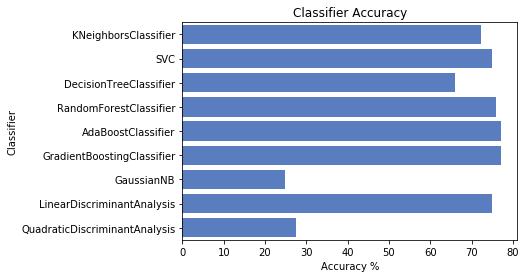

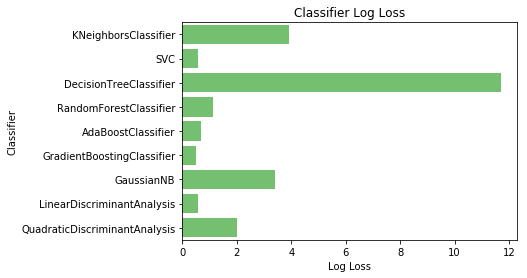

In [152]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

### In here we found out that Gradien Boosting Classifier produces good enough predictions : 75%

In [154]:
# Predict Test Set
favorite_clf = GradientBoostingClassifier()
favorite_clf.fit(X_train, y_train)
submission = pd.DataFrame(favorite_clf.predict(X_test),index=X_test.index,columns=['Prediction'])

In [163]:
# See the prediction result
result = pd.concat([X_test, y_test,submission], axis=1)
# Find the accuracy through the scoring process
accuracy = clfsvm.score(X_test,y_test)
print("Accuracy: {:.4%}".format(accuracy))

# result
print(result.shape)
result.Prediction.value_counts()

Accuracy: 74.7500%
(4000, 12)


0    3738
1     262
Name: Prediction, dtype: int64

### In the end we found that our predictions produces 3738 safety driving and 262 reckless driving with accuracy of 74.75%

# Producing Further Model Evaluations

In [173]:
from sklearn import metrics

# calculate null accuracy (for multi-class classification problems)
print('classification accuracy: ',metrics.accuracy_score(y_test, submission))
print('null accuracy: ',y_test.value_counts().head(1).values[0] / len(y_test))

classification accuracy:  0.77025
null accuracy:  0.74975


In [180]:
print('Confusion Matrix')
print(metrics.confusion_matrix(y_test, submission))

Confusion Matrix
[[2909   90]
 [ 829  172]]


# ROC Curves and  Area Under Curve (AUC)

Managing sensitivity and specificity by several thresholds

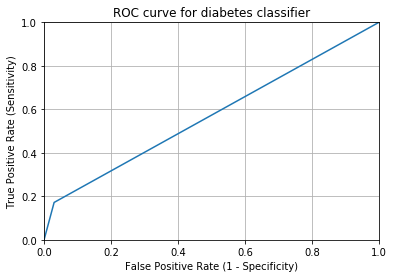

In [181]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, submission)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [182]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [188]:
evaluate_threshold(0.5)

Sensitivity: 0.17182817182817184
Specificity: 0.9699899966655552


In [193]:
evaluate_threshold(1)

Sensitivity: 0.0
Specificity: 1.0


In [194]:
print(metrics.roc_auc_score(y_test, submission))

0.5709090842468635
